<a href="https://colab.research.google.com/github/abhishek210597/ML_DL_using_Python/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##LSTM model

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# url = "https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv"
# tataglobal_df = pd.read_csv(url)

tataglobal_df = pd.read_csv("/content/MRF_NS.csv")

tataglobal_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-06-22,67600.000000,68230.000000,67350.000000,68040.601563,67913.750000,4849
1,2022-06-23,68040.601563,69280.000000,68040.546875,69006.203125,68877.554688,7455
2,2022-06-24,68900.000000,70775.000000,68900.000000,70553.000000,70421.460938,12532
3,2022-06-27,71200.000000,71907.703125,70900.000000,71221.750000,71088.976563,8117
4,2022-06-28,71000.000000,72599.750000,70567.703125,72268.648438,72133.921875,10643
...,...,...,...,...,...,...,...
206,2023-04-24,86945.000000,87200.000000,86300.000000,86896.148438,86896.148438,3160
207,2023-04-25,87100.000000,87399.953125,86086.000000,86561.453125,86561.453125,3991
208,2023-04-26,86550.000000,87332.898438,86400.000000,87231.203125,87231.203125,4413
209,2023-04-27,87497.000000,87600.000000,86810.000000,87455.898438,87455.898438,3368


In [ ]:
tataglobal_df.shape

(211, 7)

In [ ]:
tataglobal_df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [ ]:
tataglobal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       211 non-null    object 
 1   Open       211 non-null    float64
 2   High       211 non-null    float64
 3   Low        211 non-null    float64
 4   Close      211 non-null    float64
 5   Adj Close  211 non-null    float64
 6   Volume     211 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 11.7+ KB


In [ ]:
tataglobal_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000
mean,85745.135738,86604.497334,84821.391884,85707.099563,85687.452977,10401.104265
std,5355.167189,5303.385492,5179.004606,5214.095623,5246.173340,9121.491486
min,67600.000000,68230.000000,67350.000000,68040.601563,67913.750000,2396.000000
25%,83528.000000,84472.000000,82353.574219,83145.078125,83142.257812,5800.500000
50%,86610.750000,87388.000000,85685.148438,86363.148438,86363.148438,7893.000000
75%,89279.500000,89988.449219,88314.800782,89084.050782,89081.058594,11983.500000
max,94711.953125,96000.000000,94060.046875,94900.101563,94893.664063,80686.000000


In [ ]:
tataglobal_df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
tataglobal_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-06-22,67600.000000,68230.000000,67350.000000,68040.601563,67913.750000,4849
1,2022-06-23,68040.601563,69280.000000,68040.546875,69006.203125,68877.554688,7455
2,2022-06-24,68900.000000,70775.000000,68900.000000,70553.000000,70421.460938,12532
3,2022-06-27,71200.000000,71907.703125,70900.000000,71221.750000,71088.976563,8117
4,2022-06-28,71000.000000,72599.750000,70567.703125,72268.648438,72133.921875,10643


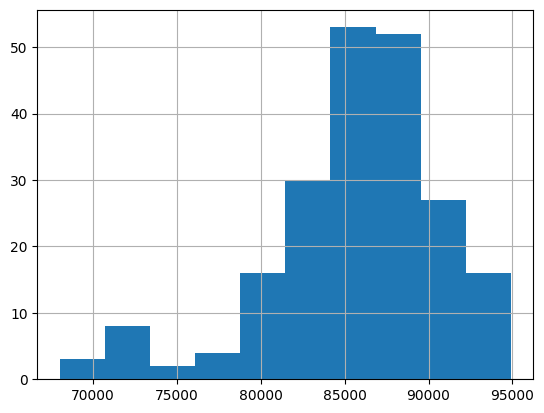

In [ ]:
tataglobal_df.Close.hist();

In [ ]:
# Imoporting data again but this time parse dates

df = pd.read_csv("/content/MRF_NS.csv",
                 parse_dates=["Date"])
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-06-22,67600.000000,68230.000000,67350.000000,68040.601563,67913.750000,4849
1,2022-06-23,68040.601563,69280.000000,68040.546875,69006.203125,68877.554688,7455
2,2022-06-24,68900.000000,70775.000000,68900.000000,70553.000000,70421.460938,12532
3,2022-06-27,71200.000000,71907.703125,70900.000000,71221.750000,71088.976563,8117
4,2022-06-28,71000.000000,72599.750000,70567.703125,72268.648438,72133.921875,10643


In [ ]:
df.Date.dtype

dtype('<M8[ns]')

In [ ]:
tataglobal_df.Date.dtype

dtype('O')

In [ ]:

tataglobal_df.Date.head()

0    2022-06-22
1    2022-06-23
2    2022-06-24
3    2022-06-27
4    2022-06-28
Name: Date, dtype: object

In [ ]:
df.Date.head()

0   2022-06-22
1   2022-06-23
2   2022-06-24
3   2022-06-27
4   2022-06-28
Name: Date, dtype: datetime64[ns]

In [ ]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-06-22,67600.000000,68230.000000,67350.000000,68040.601563,67913.750000,4849
1,2022-06-23,68040.601563,69280.000000,68040.546875,69006.203125,68877.554688,7455
2,2022-06-24,68900.000000,70775.000000,68900.000000,70553.000000,70421.460938,12532
3,2022-06-27,71200.000000,71907.703125,70900.000000,71221.750000,71088.976563,8117
4,2022-06-28,71000.000000,72599.750000,70567.703125,72268.648438,72133.921875,10643


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
206,2023-04-24,86945.000000,87200.000000,86300.0,86896.148438,86896.148438,3160
207,2023-04-25,87100.000000,87399.953125,86086.0,86561.453125,86561.453125,3991
208,2023-04-26,86550.000000,87332.898438,86400.0,87231.203125,87231.203125,4413
209,2023-04-27,87497.000000,87600.000000,86810.0,87455.898438,87455.898438,3368
210,2023-04-28,87437.351563,89300.000000,87376.0,89006.796875,89006.796875,7620


In [ ]:
# Sort Dataframe in date order

df.sort_values(by=["Date"], inplace=True, ascending=True)
df.Date.head()

0   2022-06-22
1   2022-06-23
2   2022-06-24
3   2022-06-27
4   2022-06-28
Name: Date, dtype: datetime64[ns]

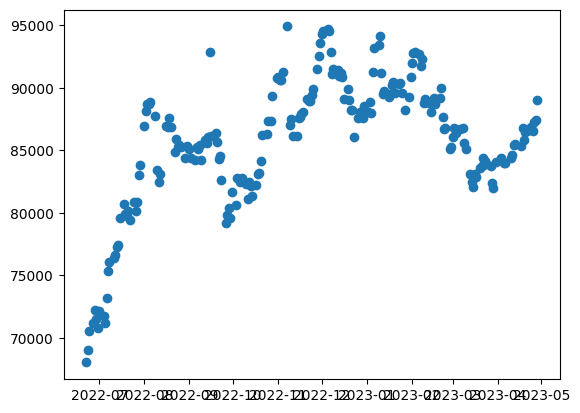

In [ ]:
# Let's visualize closing price vs Date...


fig, ax = plt.subplots()
ax.scatter(df.Date, df.Close);

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-06-22,67600.000000,68230.000000,67350.000000,68040.601563,67913.750000,4849
1,2022-06-23,68040.601563,69280.000000,68040.546875,69006.203125,68877.554688,7455
2,2022-06-24,68900.000000,70775.000000,68900.000000,70553.000000,70421.460938,12532
3,2022-06-27,71200.000000,71907.703125,70900.000000,71221.750000,71088.976563,8117
4,2022-06-28,71000.000000,72599.750000,70567.703125,72268.648438,72133.921875,10643
...,...,...,...,...,...,...,...
206,2023-04-24,86945.000000,87200.000000,86300.000000,86896.148438,86896.148438,3160
207,2023-04-25,87100.000000,87399.953125,86086.000000,86561.453125,86561.453125,3991
208,2023-04-26,86550.000000,87332.898438,86400.000000,87231.203125,87231.203125,4413
209,2023-04-27,87497.000000,87600.000000,86810.000000,87455.898438,87455.898438,3368


In [ ]:
copy_df = df.copy()
copy_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-06-22,67600.000000,68230.000000,67350.000000,68040.601563,67913.750000,4849
1,2022-06-23,68040.601563,69280.000000,68040.546875,69006.203125,68877.554688,7455
2,2022-06-24,68900.000000,70775.000000,68900.000000,70553.000000,70421.460938,12532
3,2022-06-27,71200.000000,71907.703125,70900.000000,71221.750000,71088.976563,8117
4,2022-06-28,71000.000000,72599.750000,70567.703125,72268.648438,72133.921875,10643
...,...,...,...,...,...,...,...
206,2023-04-24,86945.000000,87200.000000,86300.000000,86896.148438,86896.148438,3160
207,2023-04-25,87100.000000,87399.953125,86086.000000,86561.453125,86561.453125,3991
208,2023-04-26,86550.000000,87332.898438,86400.000000,87231.203125,87231.203125,4413
209,2023-04-27,87497.000000,87600.000000,86810.000000,87455.898438,87455.898438,3368


In [ ]:
copy_df.reset_index(inplace =True)
copy_df

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2022-06-22,67600.000000,68230.000000,67350.000000,68040.601563,67913.750000,4849
1,1,2022-06-23,68040.601563,69280.000000,68040.546875,69006.203125,68877.554688,7455
2,2,2022-06-24,68900.000000,70775.000000,68900.000000,70553.000000,70421.460938,12532
3,3,2022-06-27,71200.000000,71907.703125,70900.000000,71221.750000,71088.976563,8117
4,4,2022-06-28,71000.000000,72599.750000,70567.703125,72268.648438,72133.921875,10643
...,...,...,...,...,...,...,...,...
206,206,2023-04-24,86945.000000,87200.000000,86300.000000,86896.148438,86896.148438,3160
207,207,2023-04-25,87100.000000,87399.953125,86086.000000,86561.453125,86561.453125,3991
208,208,2023-04-26,86550.000000,87332.898438,86400.000000,87231.203125,87231.203125,4413
209,209,2023-04-27,87497.000000,87600.000000,86810.000000,87455.898438,87455.898438,3368


In [ ]:
copy_df.drop("index", axis=1, inplace=True)

In [ ]:
copy_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-06-22,67600.000000,68230.000000,67350.000000,68040.601563,67913.750000,4849
1,2022-06-23,68040.601563,69280.000000,68040.546875,69006.203125,68877.554688,7455
2,2022-06-24,68900.000000,70775.000000,68900.000000,70553.000000,70421.460938,12532
3,2022-06-27,71200.000000,71907.703125,70900.000000,71221.750000,71088.976563,8117
4,2022-06-28,71000.000000,72599.750000,70567.703125,72268.648438,72133.921875,10643
...,...,...,...,...,...,...,...
206,2023-04-24,86945.000000,87200.000000,86300.000000,86896.148438,86896.148438,3160
207,2023-04-25,87100.000000,87399.953125,86086.000000,86561.453125,86561.453125,3991
208,2023-04-26,86550.000000,87332.898438,86400.000000,87231.203125,87231.203125,4413
209,2023-04-27,87497.000000,87600.000000,86810.000000,87455.898438,87455.898438,3368


In [ ]:
# Let's see correlation matrix...
copy_df.corr()

<ipython-input-105-51a1e81f09ab>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  copy_df.corr()


,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.986238,0.983606,0.968670,0.968988,0.141818
High,0.986238,1.000000,0.980394,0.986439,0.986623,0.222067
Low,0.983606,0.980394,1.000000,0.988590,0.988716,0.058727
Close,0.968670,0.986439,0.988590,1.000000,0.999983,0.139253
Adj Close,0.968988,0.986623,0.988716,0.999983,1.000000,0.138949
Volume,0.141818,0.222067,0.058727,0.139253,0.138949,1.000000


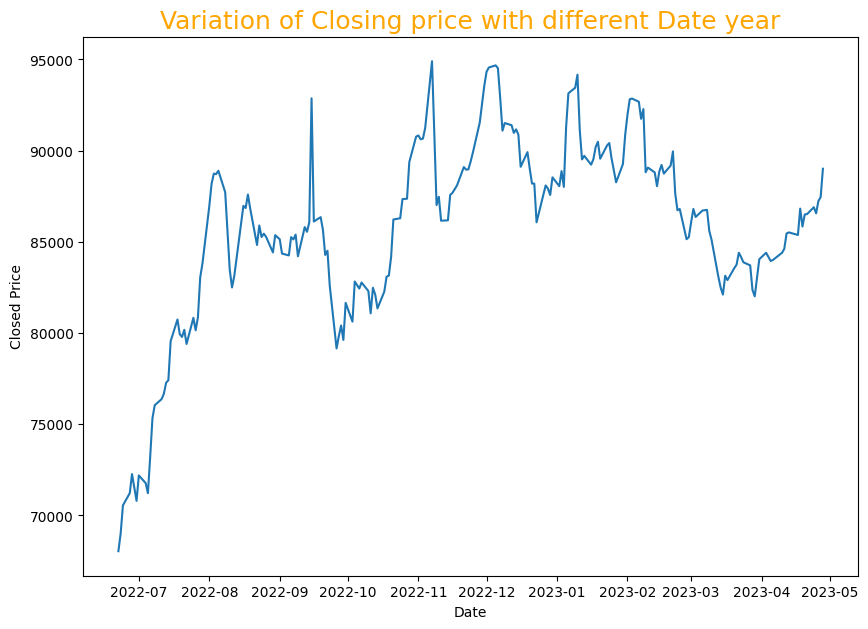

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(copy_df["Date"],
         copy_df["Close"])
plt.xlabel("Date")
plt.ylabel("Closed Price");
plt.title("Variation of Closing price with different Date year",
          color="orange",
          fontsize=18);

##Applying univariate approch by selecting Closing Price as target variables.
Univariate Analysis of Closing Price
For this task, i am just doing univariate analysis of Closing Price using Stacked LSTM and just taking close attribute from our dataset

In [ ]:
# Considering only `Close` variable...

close_df = copy_df["Close"]
close_df

0      68040.601563
1      69006.203125
2      70553.000000
3      71221.750000
4      72268.648438
           ...     
206    86896.148438
207    86561.453125
208    87231.203125
209    87455.898438
210    89006.796875
Name: Close, Length: 211, dtype: float64

# Exploration and Analysis of Dataset

In [ ]:
close_df.size

211

In [ ]:
close_df.shape

(211,)

In [ ]:
close_df.info()

<class 'pandas.core.series.Series'>
RangeIndex: 211 entries, 0 to 210
Series name: Close
Non-Null Count  Dtype  
--------------  -----  
211 non-null    float64
dtypes: float64(1)
memory usage: 1.8 KB


In [ ]:
close_df.describe()

count      211.000000
mean     85707.099563
std       5214.095623
min      68040.601563
25%      83145.078125
50%      86363.148438
75%      89084.050782
max      94900.101563
Name: Close, dtype: float64

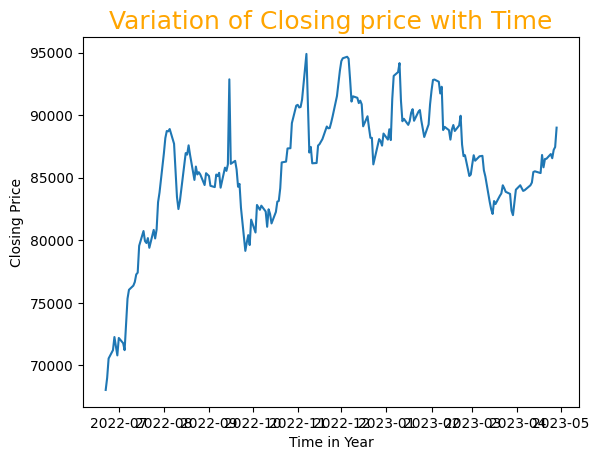

In [ ]:
plt.plot(copy_df.Date, close_df)
plt.xlabel("Time in Year")
plt.ylabel("Closing Price");
plt.title("Variation of Closing price with Time",
          color="orange",
          fontsize=18);

#Preprocessing by MinMax Scaler.
LSTM is very sensitive to small change in value and so to the scale of the data. Thus, using MinMax Scaler, we scale it in the range of [0,1]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler(feature_range=(0,1)) # (0,1) by default.But mentioned for understanding
close_df = minmax.fit_transform(np.array(close_df).reshape(-1, 1))
close_df

array([[0.        ],
       [0.03595009],
       [0.09353854],
       [0.11843662],
       [0.15741346],
       [0.12968032],
       [0.10276799],
       [0.1546453 ],
       [0.13908865],
       [0.11841422],
       [0.19321289],
       [0.27168402],
       [0.29800821],
       [0.31032782],
       [0.32107995],
       [0.34375727],
       [0.34901234],
       [0.42880545],
       [0.47290152],
       [0.44309072],
       [0.43723822],
       [0.45189958],
       [0.4229416 ],
       [0.47630988],
       [0.45084985],
       [0.47746055],
       [0.55868123],
       [0.5874103 ],
       [0.70402465],
       [0.74955032],
       [0.77061567],
       [0.76960462],
       [0.77644229],
       [0.73258618],
       [0.57432193],
       [0.53836079],
       [0.5618217 ],
       [0.70481027],
       [0.70042257],
       [0.72789685],
       [0.69939116],
       [0.62501716],
       [0.66474996],
       [0.64125909],
       [0.64797924],
       [0.64154763],
       [0.60976738],
       [0.644

In [ ]:
train_size = int(len(close_df)*0.7)
test_size = len(close_df) - train_size
train_data = close_df[:train_size, :] # Slicing row from 0 to train_size indexlocation but column is kept unsliced.
test_data = close_df[train_size:len(close_df), :1]

In [ ]:
train_data.shape

(147, 1)

In [ ]:
test_data.shape

(64, 1)

In [ ]:
test_data[:10]

array([[0.82800313],
       [0.83299758],
       [0.80162134],
       [0.75282489],
       [0.79015979],
       [0.8499338 ],
       [0.89059184],
       [0.9224576 ],
       [0.92379791],
       [0.91726391]])

#Preparing our dataset for training, fitting and testing of LSTM model


Suppose our dataset is: 122, 124, 135, 167, 187, 193, 199, 221, 228, 300

train_data = 122, 124, 135, 167, 187, 193

test_data =  199, 221, 228, 300


In [ ]:
#This function will create dataset as mentioned above...

def create_dataset(dataset, time_step):
    X_data = []
    Y_data = []
    for i in range(len(dataset)-time_step-1):
        X_data.append(dataset[i:(i+time_step), 0])
        Y_data.append(dataset[i+time_step, 0])
    return np.array(X_data), np.array(Y_data)

In [ ]:
# Reshaping into tuples of the form with X=t, t+1,..t+99 and Y=t+100 for time_step=100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [ ]:
X_train.shape

(46, 100)

In [ ]:
y_train.shape

(46,)

In [ ]:
X_test.shape, y_test.shape

((0,), (0,))

## Reshaping input into 3-Dimensional form required for LSTM.

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

IndexError: ignored

# Constructing Stacked LSTM model.

In [ ]:
# Constructing our stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1))) #Input layer with 50 neurons
model.add(LSTM(50, return_sequences=True)) # Hidden layers with 50 neurons
model.add(LSTM(50))
model.add(Dense(1))# Output Layer
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_7 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1);

Epoch 1/100
1/1 [==============================] - 0s 339ms/step - loss: 0.0078
Epoch 2/100
1/1 [==============================] - 0s 307ms/step - loss: 0.0078
Epoch 3/100
1/1 [==============================] - 0s 290ms/step - loss: 0.0078
Epoch 4/100
1/1 [==============================] - 0s 291ms/step - loss: 0.0078
Epoch 5/100
1/1 [==============================] - 0s 178ms/step - loss: 0.0078
Epoch 6/100
1/1 [==============================] - 0s 188ms/step - loss: 0.0078
Epoch 7/100
1/1 [==============================] - 0s 279ms/step - loss: 0.0078
Epoch 8/100
1/1 [==============================] - 0s 216ms/step - loss: 0.0078
Epoch 9/100
1/1 [==============================] - 0s 170ms/step - loss: 0.0078
Epoch 10/100
1/1 [==============================] - 0s 181ms/step - loss: 0.0078
Epoch 11/100
1/1 [==============================] - 0s 169ms/step - loss: 0.0078
Epoch 12/100
1/1 [==============================] - 0s 165ms/step - loss: 0.0078
Epoch 13/100
1/1 [===================

#Evaluation of constructed LSTM Model.
Visualizing Loss Function...

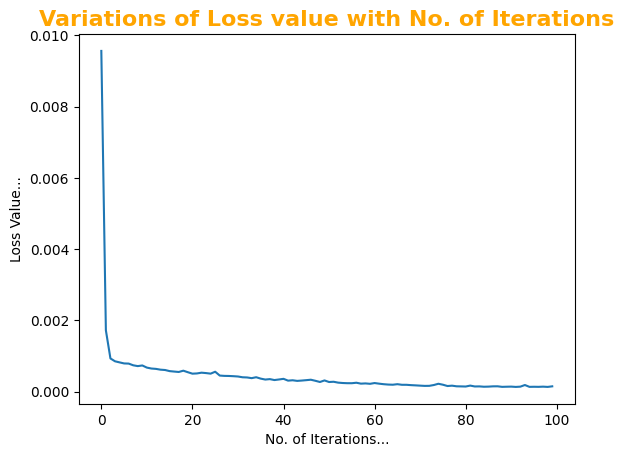

In [ ]:
# Ploting Loss of our trained model

loss = model.history.history['loss']
plt.plot(loss)
plt.xlabel("No. of Iterations...")
plt.ylabel("Loss Value...")
plt.title("Variations of Loss value with No. of Iterations", color="orange", fontsize=16, fontweight="bold");

In [ ]:
train_preds = minmax.inverse_transform(model.predict(X_train))
test_preds = minmax.inverse_transform(model.predict(X_test))

16/16 [==============================] - 1s 35ms/step


In [ ]:
import math
from sklearn.metrics import mean_squared_error

math.sqrt(mean_squared_error(y_train,train_preds))

134.52401855600155

In [ ]:
math.sqrt(mean_squared_error(y_test, test_preds))

210.55123363835816

In [ ]:
close_df

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

In [ ]:
train_preds.shape

(1323, 1)

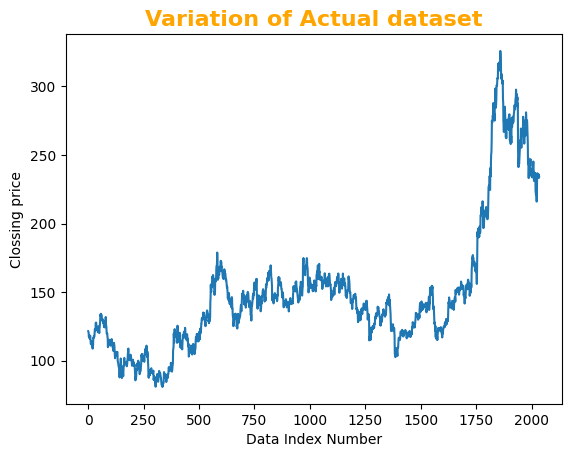

In [ ]:
# shift train predictions for plotting

look_back=100  # to align predicted and actual on same curve...

trainPredictPlot = np.empty_like(close_df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_preds)+look_back, :] = train_preds

# shift test predictions for plotting
testPredictPlot = np.empty_like(close_df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_preds)+(look_back*2)+1:len(close_df)-1, :] = test_preds

# plot baseline i.e. Actual value of Closing price..

plt.plot(minmax.inverse_transform(close_df))
plt.title("Variation of Actual dataset", color="orange", fontsize=16, fontweight="bold")
plt.xlabel("Data Index Number")
plt.ylabel("Clossing price");

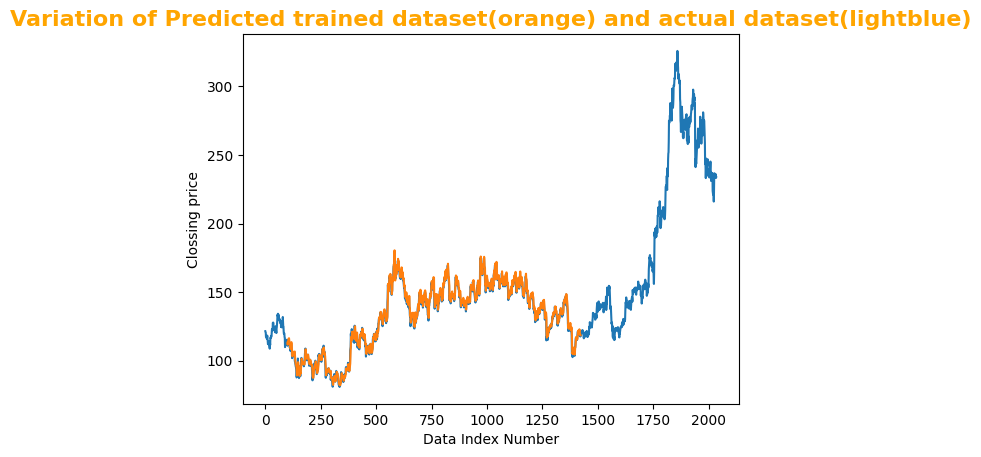

In [ ]:
# Plot of Predictions on Closing Price made by our model on training dataset vs Actual Closing Price

plt.plot(minmax.inverse_transform(close_df))
plt.plot(trainPredictPlot)
plt.title("Variation of Predicted trained dataset(orange) and actual dataset(lightblue)", color="orange", fontsize=16, fontweight="bold")
plt.xlabel("Data Index Number")
plt.ylabel("Clossing price");

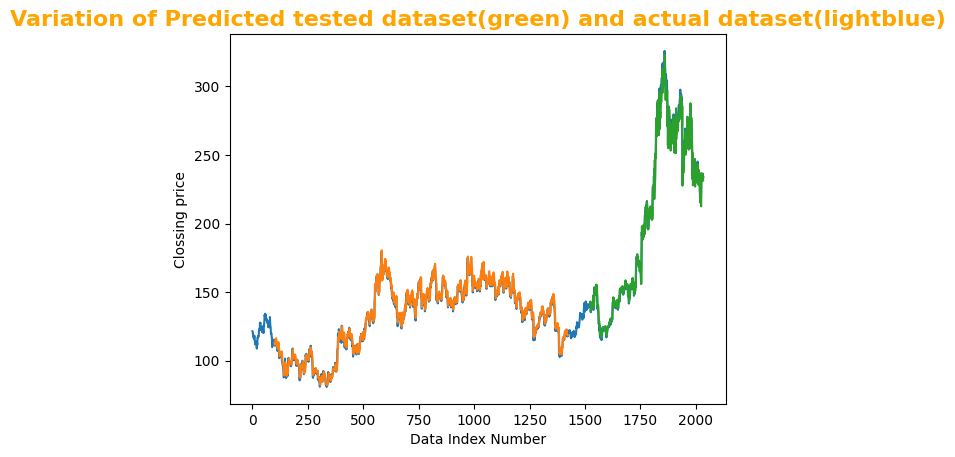

In [ ]:
# Plot of Predictions on Closing Price made by our model on training dataset vs Actual Closing Price
# vs Predictions on CLosing Price made by our model on test dataset

plt.plot(minmax.inverse_transform(close_df))
plt.plot(trainPredictPlot)
plt.title("Variation of Predicted tested dataset(green) and actual dataset(lightblue)", color="orange", fontsize=16, fontweight="bold")
plt.xlabel("Data Index Number")
plt.ylabel("Clossing price");
plt.plot(testPredictPlot)
plt.show()

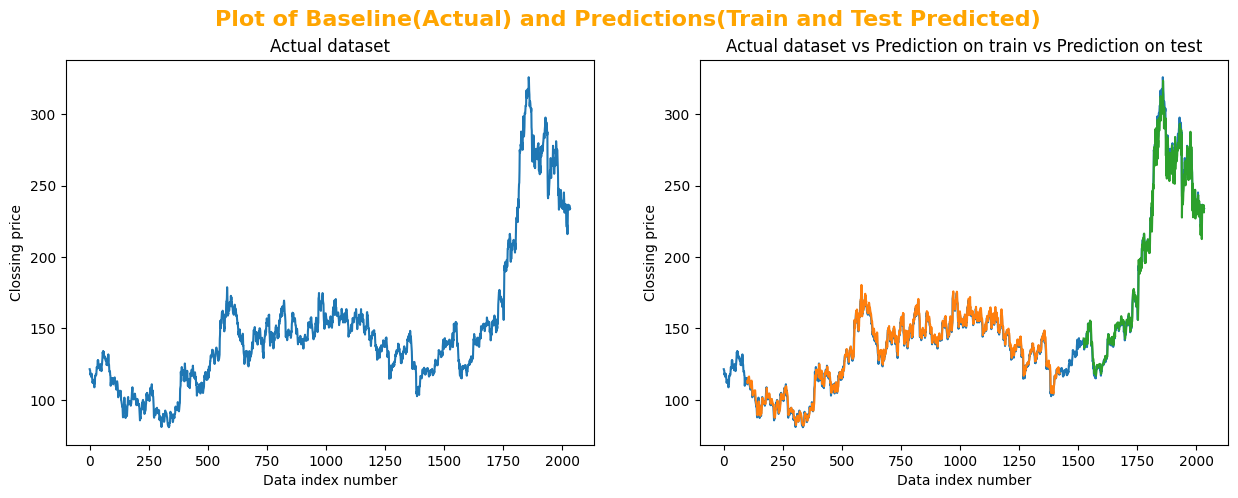

In [ ]:
fig, (ax0, ax1) = plt.subplots(nrows=1,
                               ncols=2,
                               figsize=(15,5))
ax0.plot(minmax.inverse_transform(close_df))
ax0.set(xlabel="Data index number",
        ylabel="Clossing price",
        title="Actual dataset");

ax0.set(xlabel="Data index number",
        ylabel="Clossing price",
        title="Actual dataset");

ax1.plot(minmax.inverse_transform(close_df))
ax1.plot(trainPredictPlot)
ax1.plot(testPredictPlot)


ax1.set(xlabel="Data index number",
        ylabel="Clossing price",
        title="Actual dataset vs Prediction on train vs Prediction on test");

fig.suptitle(t="Plot of Baseline(Actual) and Predictions(Train and Test Predicted)",
             color="orange",
             fontsize=16,
             fontweight="bold");


#Step-9: Forecasting for future 30 days.

In [ ]:
# Let's check length of test_data...

len(test_data)

611

In [ ]:
test_data.shape

(611, 1)

# Considering last 100 days data for the future prediction...

611-100 = 511

In [ ]:
preds_input = test_data[511:]
preds_input[:5]

array([[0.85273693],
       [0.86213235],
       [0.83455882],
       [0.84375   ],
       [0.71466503]])

In [ ]:
preds_input.shape

(100, 1)

In [ ]:
# Reshaping into row matrix

preds_input = preds_input.reshape(1, -1)
preds_input.shape

(1, 100)

In [ ]:
temp_input = list(preds_input)
len(temp_input)

1

In [ ]:
temp_input = temp_input[0].tolist()

In [ ]:
len(temp_input)

100

In [ ]:
type(temp_input)

list

In [ ]:
preds_input.shape[1]

100

# Demonstrating prediction for next 3 days just for debugging and understanding how it is working

In [ ]:
#demonstrating prediction for next 30 days

Thirty_days_output=[]
i=0

while(i<30):
    if(len(temp_input)>100):
        temp_input = temp_input[1:]
        preds_input=np.array(temp_input) # getting latest 100 data
        preds_input=preds_input.reshape(1,-1)



    preds_input = preds_input.reshape((1, time_step,1))
    day_output = model.predict(preds_input, verbose=0)
    temp_input.extend(day_output[0].tolist())
    Thirty_days_output.extend(day_output.tolist())

    #print(f"Day-{i+1} input:\n\n{preds_input}\n\n")
    #print(f"Day-{i+1} output:\n\n{day_output}\n\n")
    i=i+1

In [ ]:
print(Thirty_days_output)

[[0.6198039054870605], [0.6107912063598633], [0.601123571395874], [0.5922377705574036], [0.5839852690696716], [0.5761100649833679], [0.5685631036758423], [0.5614027976989746], [0.5547066926956177], [0.5485406517982483], [0.5429519414901733], [0.5379694104194641], [0.5336037278175354], [0.529848575592041], [0.5266834497451782], [0.5240762233734131], [0.5219857096672058], [0.5203640460968018], [0.519159197807312], [0.5183169841766357], [0.51778244972229], [0.5175014138221741], [0.5174216628074646], [0.5174937844276428], [0.517672061920166], [0.5179144144058228], [0.5181840062141418], [0.5184482932090759], [0.5186797380447388], [0.51885586977005]]


In [ ]:

latest_100_days = np.arange(1,101)
predicted_30_days = np.arange(101,131)

In [ ]:
len(close_df)

2035

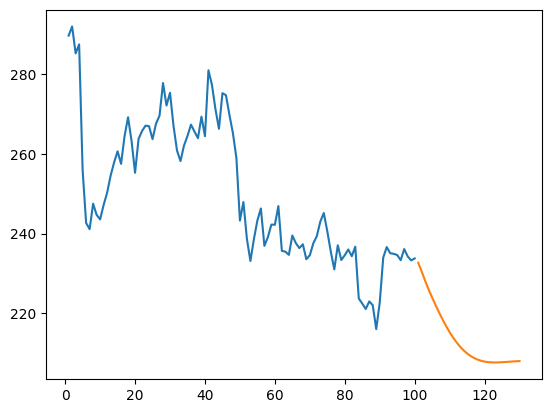

In [ ]:
Latest_100_days_output = close_df[1935:]
plt.plot(latest_100_days, minmax.inverse_transform(Latest_100_days_output))
plt.plot(predicted_30_days, minmax.inverse_transform(Thirty_days_output));

# Graph is discontinuous but we can make graph continuous by appending both Latest_100_days_output and Thirty_days_output data in a list.

In [ ]:
type(Latest_100_days_output), type(Thirty_days_output)

(numpy.ndarray, list)

In [ ]:
Latest_100_days_output_list = Latest_100_days_output.tolist()
Latest_100_days_output_list.extend(Thirty_days_output)
print(len(Latest_100_days_output_list))

130


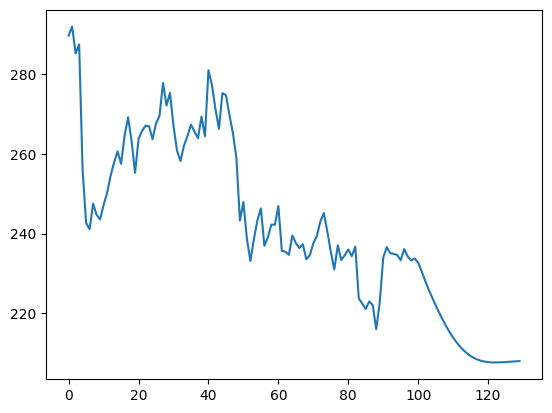

In [ ]:
plt.plot(minmax.inverse_transform(Latest_100_days_output_list));

## Let's Visualize in single frame...

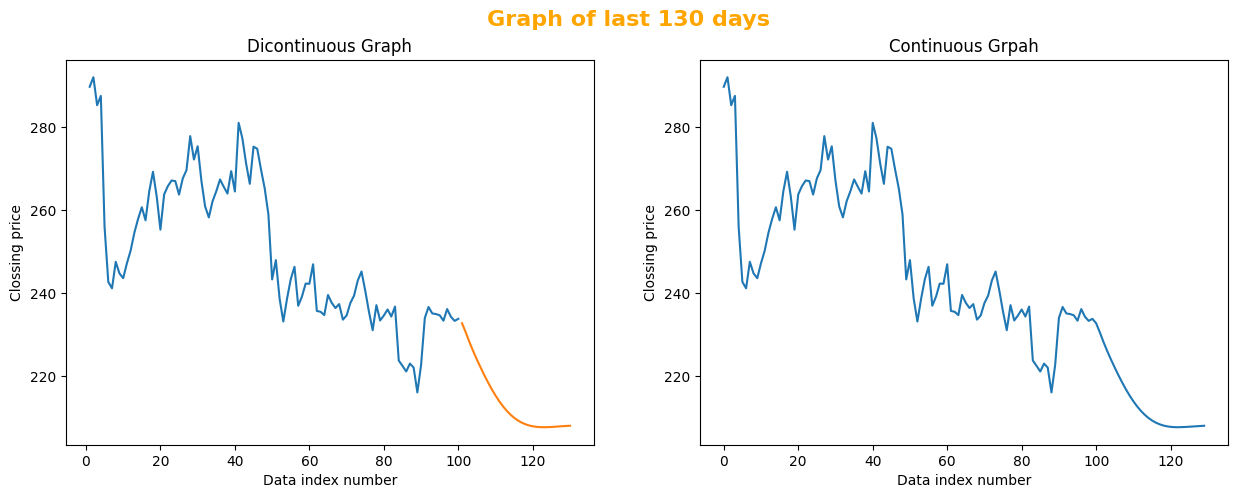

In [ ]:
fig, (ax0, ax1) = plt.subplots(nrows=1,
                               ncols=2,
                               figsize=(15,5))

ax0.plot(latest_100_days, minmax.inverse_transform(Latest_100_days_output))
ax0.plot(predicted_30_days, minmax.inverse_transform(Thirty_days_output));

ax0.set(xlabel="Data index number",
        ylabel="Clossing price",
        title="Dicontinuous Graph");



ax1.plot(minmax.inverse_transform(Latest_100_days_output_list));


ax1.set(xlabel="Data index number",
        ylabel="Clossing price",
        title="Continuous Grpah");

fig.suptitle(t="Graph of last 130 days",
             color="orange",
             fontsize=16,
             fontweight="bold");